In [ ]:
"""Fetching the dataset"""
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

In [3]:
"""Looking at the data"""
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

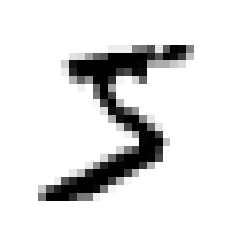

'5'

In [18]:
"""Displaying the digit by reshaping it into 28*28 array"""
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit = X.iloc[0]
some_digit = np.array(some_digit, dtype="float")
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

y[0]

In [20]:
"""Convert y to integer"""
y = y.astype(np.uint8)

In [22]:
"""Splitting into training & testing dataset"""
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
"""Training a binary classifier"""
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [3]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

NameError: name 'X_train' is not defined

In [25]:
sgd_clf.predict([some_digit])

array([ True])

In [28]:
"""Measuring accuracy using cross validation"""
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [2]:
"""Confusion matrix"""
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

NameError: name 'sgd_clf' is not defined

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
"""Precision & Recall"""

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [35]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_pred, y_train_5)

0.7325171197343846

In [1]:
"""Precision Recall Trade Off"""
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

NameError: name 'cross_val_predict' is not defined